<a href="https://colab.research.google.com/github/onyboo/GarbageClassification/blob/main/2215151112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


Create Synthetic Data

In [ ]:
# y = 2x + 3 + noise
X = torch.linspace(0, 10, 100).reshape(-1, 1)
true_weights = 2
true_bias = 3
noise = torch.randn(X.size()) * 0.5
y = true_weights * X + true_bias + noise


Define the Linear Regression Model

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


Train the Model

In [ ]:
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 500
for epoch in range(epochs):
    model.train()

    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 1.6320
Epoch [100/500], Loss: 1.1142
Epoch [150/500], Loss: 0.7994
Epoch [200/500], Loss: 0.6080
Epoch [250/500], Loss: 0.4917
Epoch [300/500], Loss: 0.4209
Epoch [350/500], Loss: 0.3779
Epoch [400/500], Loss: 0.3518
Epoch [450/500], Loss: 0.3359
Epoch [500/500], Loss: 0.3262


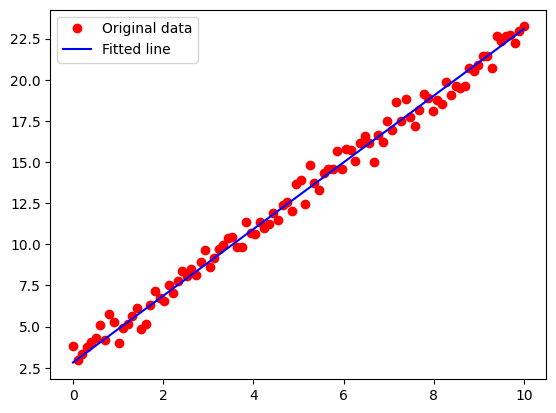

In [ ]:
predicted = model(X).detach().numpy()
plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
plt.plot(X.numpy(), predicted, 'b', label='Fitted line')
plt.legend()
plt.show()

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[2.0263]])
linear.bias tensor([2.8165])


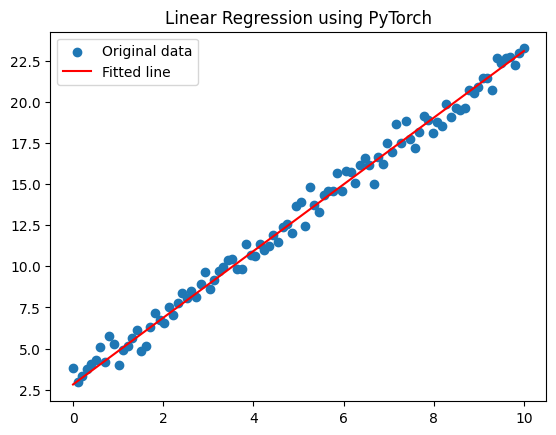

In [ ]:
predicted = model(X).detach()

plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted.numpy(), color='red', label='Fitted line')
plt.legend()
plt.title('Linear Regression using PyTorch')
plt.show()


Conclusion

### ✅ Conclusion
- The model successfully learned the linear relationship from synthetic data.
- The loss decreased over time, and the final model predictions closely match the original data.